In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\M RAJESH\Desktop\Ekeeda DS\50_Startups.csv')
df.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

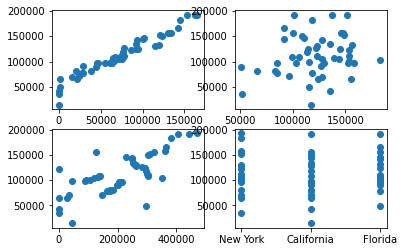

In [4]:
plt.subplot(2,2,1)
plt.scatter(df['R&D Spend'],df['Profit'])
plt.subplot(2,2,2)
plt.scatter(df['Administration'],df['Profit'])
plt.subplot(2,2,3)
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.subplot(2,2,4)
plt.scatter(df['State'],df['Profit'])

one hot encoding on state column

In [5]:
dummies = pd.get_dummies(df['State'])

In [6]:
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [7]:
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [8]:
df_concat = pd.concat([df.drop('State',axis=1),dummies.drop('New York',axis=1)],axis=1)

In [9]:
df_concat.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [10]:
df_concat.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
California           uint8
Florida              uint8
dtype: object

In [11]:
x=df_concat.drop('Profit',axis=1)
y=df_concat.Profit

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [13]:
len(X_train),len(X_test)

(40, 10)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [16]:
X_train

array([[-0.97529324, -0.03976422, -0.30882252,  1.36277029, -0.65465367],
       [ 0.54905502,  0.8802644 ,  0.64202486, -0.73379939, -0.65465367],
       [ 0.48179228, -0.19131086,  0.7489533 , -0.73379939,  1.52752523],
       [ 2.18417885,  0.59661579,  2.28086494, -0.73379939, -0.65465367],
       [ 0.02747829,  0.28337156,  1.25360885, -0.73379939, -0.65465367],
       [-0.35679942, -0.57685795,  0.05356707, -0.73379939,  1.52752523],
       [-0.97738814,  0.25534092, -0.06343235, -0.73379939,  1.52752523],
       [-1.0935674 , -0.81501337, -0.52358053,  1.36277029, -0.65465367],
       [ 0.71688619, -0.31551207,  0.17938519, -0.73379939,  1.52752523],
       [ 1.69898067, -0.03540188,  1.51359071, -0.73379939, -0.65465367],
       [-0.99521785, -1.21306353, -0.38092914, -0.73379939,  1.52752523],
       [ 0.48741825,  0.5479736 ,  0.38296485,  1.36277029, -0.65465367],
       [-1.60996088, -0.13442634,  0.76796433, -0.73379939,  1.52752523],
       [ 1.90875112, -0.64315792,  1.7

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [18]:
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
reg.coef_

array([35968.78839911, -1059.6541938 ,  3092.05009462,   504.66248747,
        1088.20631167])

In [20]:
reg.intercept_

109601.896

In [21]:
y_pred = reg.predict(X_test)

In [22]:
y_pred

array([117456.38514801, 134250.85077004, 155227.44334151, 134039.52174694,
        45555.06570481, 167075.93112826,  93032.3514161 , 102550.22088127,
        45367.23484064, 101463.95502243])

<AxesSubplot:xlabel='Profit'>

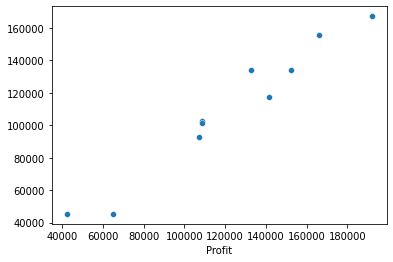

In [23]:
sns.scatterplot(y_test,y_pred)

In [24]:
residuals = y_test-y_pred

In [25]:
residuals

12    24129.134852
14    -1648.200770
4     10960.496658
8     18172.248253
45    19371.014295
1     24716.128872
25    14371.988584
24     6001.819119
47    -2807.504841
23     7270.034978
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Profit', ylabel='Density'>

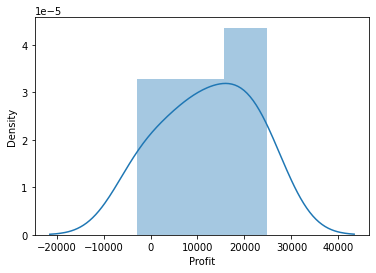

In [26]:
sns.distplot(residuals,kde=True)

<AxesSubplot:ylabel='Profit'>

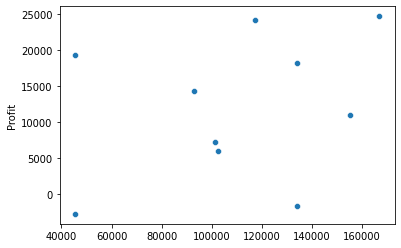

In [27]:
sns.scatterplot(y_pred,residuals)

R square and adjusted R square Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred) 

In [29]:
score

0.8734437277229112

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [30]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7152483873765503